In [1]:
from thpoker.core import *
from thpoker.hardcore import hcards, chcombo
import numpy as np
import os
import sys
import collections
import matplotlib.pyplot as plt
from matplotlib import cm
from PIL import ImageGrab
import cv2

In [2]:
test = cv2.imread('test.jpg')
gray = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)
cv2.imshow("Gray", gray)
cv2.waitKey(0)
test_edge = cv2.Canny(test, 30, 150)
cv2.imshow("Edged", test_edge)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
class HiddenPrints:

    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

In [3]:
card = Card('As')
print(card, card.name)

A♠ Ace of spades


In [4]:
deck = Deck()

In [5]:
cards = Cards()

In [6]:
cards.pull(deck, 5)

In [7]:
cards

[9♦, 6♣, 8♠, 2♦, J♦]

In [8]:
len(deck.cards)

47

In [9]:
my_hand = Hand('Js/Tc')

In [10]:
my_hand

[J♠, T♣]

In [11]:
game_deck = Deck()

In [12]:
deck_50 = []
for i in game_deck.cards:

    one = (my_hand.items[0] == i) and (my_hand.items[0].suit == i.suit)
    two = (my_hand.items[1] == i) and (my_hand.items[1].suit == i.suit)
    if not one and not two:
        deck_50 = deck_50 + [i]

In [13]:
len(deck_50)

50

In [14]:
game_deck.cards = deck_50

In [15]:
num_others = 3

In [16]:
p1 = Hand()
p2 = Hand()
p3 = Hand()
p4 = Hand()
p5 = Hand()
p6 = Hand()
p7 = Hand()
p8 = Hand()
p9 = Hand()

In [17]:
seats = [p1, p2, p3, p4, p5, p6, p7, p8, p9]

In [18]:
#random flop
random = True

In [19]:
#set flop
if random == False:
    flop = Table('Ac/Jh/Js')
    flop_list = []
    for i in game_deck.cards:
        one = (flop.items[0] == i) and (flop.items[0].suit == i.suit)
        two = (flop.items[1] == i) and (flop.items[1].suit == i.suit)
        three = (flop.items[2] == i) and (flop.items[2].suit == i.suit)
        if not one and not two and not three:
            flop_list = flop_list + [i]
    game_deck.cards = flop_list
else:
    flop = Table()
    flop.pull(game_deck, 3)

In [20]:
len(game_deck.cards)

47

In [21]:
#game_deck.refresh()

In [22]:
seats[1]

[]

In [23]:
digits = ['1','2','3','4','5','6','7','8','9']

In [24]:
players = []
ten_high = Combo(cards_string="9h")
cards_remaining = np.array(game_deck.cards)
beat = 0
while beat < num_others:
    beat = 0
    players = []
    for i in range(num_others):
        cards = seats[i].pull(game_deck)
        combo_opp = Combo(table = Table(), hand=seats[i])
        players = players + [seats[i]]
        if (combo_opp > ten_high):
            beat += 1
        else:
            int_1 = int(str(seats[i].items[0])[0])
            int_2 = int(str(seats[i].items[1])[0])
            if (abs(int_1 - int_2) < 3):
                if int_1 > 7 or int_2 > 7:
                    beat += 1
                elif (seats[i].items[0].suit == seats[i].items[1].suit):
                    beat += 1
            else:
                seats[i] = Hand()
    if beat == num_others:
        break
    else:
        game_deck.cards = list(cards_remaining)

In [25]:
flop

[8♦, K♦, 8♠]

In [26]:
players

[[K♥, 4♦], [J♥, 5♠], [A♣, 8♥]]

In [27]:
combo = Combo(table=flop, hand=my_hand)

In [28]:
winning = False
best = 0
for i in players:
    combo_opp = Combo(table=flop, hand=i)
    if combo < combo_opp:
        break
    else:
        best += 1
if best == len(players):
    winning = True

In [29]:
winning

False

In [30]:
turn = Cards()
turn.pull(game_deck, 1)
river = Cards()
river.pull(game_deck, 1)
table_list = flop.items + turn.items + river.items
table = Table()
table.items = table_list

In [31]:
table

[8♦, K♦, 8♠, 4♠, 3♦]

In [32]:
winning_end = False
best = 0
combo = Combo(table=table, hand=my_hand)
print(combo)
print()
for i in players:
    combo_opp = Combo(table=table, hand=i)
    print(combo_opp)
    if combo < combo_opp:
        break
    else:
        best += 1
if best == len(players):
    winning_end = True

one pair (8♦, 8♠, K♦, J♠, T♣)

two pairs (K♦, K♥, 8♦, 8♠, 4♦)


In [33]:
winning_end

False

In [34]:
wins_flop = 0
wins_full = 0
type_of_hand = []
top_hands = []
my_wins = {}
hit_at_flop = {}
hit_at_turn = {}
hit_at_river = {}

In [35]:
alert = ''

In [36]:
def run_a_table(my_hand, num_others, flop = '', turn = '', river = '', show_flop = True, show_turn = True):
    global wins_flop
    global wins_full
    global type_of_hand
    global top_hands
    global my_wins
    global hit_at_flop
    global hit_at_turn
    global hit_at_river
    just_hit = str(Combo(my_hand)).split('(')[0]
    print(just_hit)
    my_hand = Hand(my_hand)
    game_deck = Deck()
    random = True
    
    deck_50 = []
    for i in game_deck.cards:
        one = (my_hand.items[0] == i) and (my_hand.items[0].suit == i.suit)
        two = (my_hand.items[1] == i) and (my_hand.items[1].suit == i.suit)
        if not one and not two:
            deck_50 = deck_50 + [i]
    game_deck.cards = deck_50
    
    p1 = Hand()
    p2 = Hand()
    p3 = Hand()
    p4 = Hand()
    p5 = Hand()
    p6 = Hand()
    p7 = Hand()
    p8 = Hand()
    p9 = Hand()
    seats = [p1, p2, p3, p4, p5, p6, p7, p8, p9]
    
    #set flop
    if flop != '':
        flop = Table(flop)
        flop_list = []
        for i in game_deck.cards:
            one = (flop.items[0] == i) and (flop.items[0].suit == i.suit)
            two = (flop.items[1] == i) and (flop.items[1].suit == i.suit)
            three = (flop.items[2] == i) and (flop.items[2].suit == i.suit)
            if not one and not two and not three:
                flop_list = flop_list + [i]
        game_deck.cards = flop_list
        random = False
    else:
        flop = Table()
        flop.pull(game_deck, 3)
    
    players = []
    ten_high = Combo(cards_string="9h")
    cards_remaining = np.array(game_deck.cards)
    beat = 0
    while beat < num_others:
        beat = 0
        players = []
        for i in range(num_others):
            cards = seats[i].pull(game_deck)
            combo_opp = Combo(table = Table(), hand=seats[i])
            players = players + [seats[i]]
            if (combo_opp > ten_high):
                beat += 1
            else:
                int_1 = int(str(seats[i].items[0])[0])
                int_2 = int(str(seats[i].items[1])[0])
                if (abs(int_1 - int_2) < 3):
                    if int_1 > 7 or int_2 > 7:
                        beat += 1
                    elif (seats[i].items[0].suit == seats[i].items[1].suit):
                        beat += 1
                else:
                    seats[i] = Hand()
        if beat == num_others:
            break
        else:
            game_deck.cards = list(cards_remaining)
            
    combo = Combo(table=flop, hand=my_hand)
    set_hands = ['high card ', 'one pair ', 'two pairs ', 'three of a kind ', 'straight ', 'flush ', 
                 'full house ', 'four of a kind ', 'straight flush ']
    for i in set_hands:
        if i not in hit_at_flop:
            hit_at_flop[i] = []
    if (random) and (str(combo).split('(')[0] != just_hit):
        hit_at_flop[str(combo).split('(')[0]].append(1)
        just_hit = str(combo).split('(')[0]
#         for i in hit_at_flop:
#             if i != str(combo).split('(')[0]:
#                 hit_at_flop[i] += [0]
    if show_flop:
        winning = False
        best = 0
        print('At Flop:')
        print(str(num_others + 1) + ' Players')
        print('You: ' + str(combo))
        for i in players:
            combo_opp = Combo(table=flop, hand=i)
            print(combo_opp)
            if combo < combo_opp:
                continue
            else:
                best += 1
        if best == len(players):
            winning = True
            wins_flop += 1
            print('Winning at flop with ' + str(combo))
        else:
            print('Beating ' + str(best) + '/' + str(num_others) + ' Players')
        print()
    
    if turn != '':
        turn = Cards(turn)
        turn_list = []
        for i in game_deck.cards:
            one = (turn.items[0] == i) and (turn.items[0].suit == i.suit)
            if not one:
                turn_list.append(i)
        game_deck.cards = turn_list
    else:
        turn = Cards()
        turn.pull(game_deck, 1)
    table_list = flop.items + turn.items
    table = Table()
    table.items = table_list
    
    combo = Combo(table=table, hand=my_hand)
    for i in set_hands:
        if i not in hit_at_turn:
            hit_at_turn[i] = []
#     if hit_at_flop[str(combo).split('(')[0]][-1] == 0:
    if str(combo).split('(')[0] != just_hit:
        hit_at_turn[str(combo).split('(')[0]].append(1)
        just_hit = str(combo).split('(')[0]
#         for i in hit_at_turn:
#             if i != str(combo).split('(')[0]:
#                 hit_at_turn[i] += [0]
#     if hit_at_flop[str(combo).split('(')[0]][-1] == 1:
#         for i in hit_at_turn:
#             hit_at_turn[i] += [0]
    if show_turn:
        winning = False
        best = 0
        print('At Turn:')
        print(str(num_others + 1) + ' Players')
        print('You: ' + str(combo))
        for i in players:
            combo_opp = Combo(table=table, hand=i)
            print(combo_opp)
            if combo < combo_opp:
                continue
            else:
                best += 1
        if best == len(players):
            winning = True
            print('Winning at turn with ' + str(combo))
        else:
            print('Beating ' + str(best) + '/' + str(num_others) + ' Players')
        print()
    
    if river != '':
        river = Cards(river)
        river_list = []
        for i in game_deck.cards:
            one = (river.items[0] == i) and (river.items[0].suit == i.suit)
            if not one:
                river_list.append(i)
        game_deck.cards = river_list
    else:
        river = Cards()
        river.pull(game_deck, 1)
    table_list = flop.items + turn.items + river.items
    table = Table()
    table.items = table_list
#     if hit_at_turn[str(combo).split('(')[0]][-1] == 0:
#         for i in hit_at_river:
#             if i != str(combo).split('(')[0]:
#                 hit_at_river[i] += [0]
#     if hit_at_turn[str(combo).split('(')[0]][-1] == 1:
#         for i in hit_at_river:
#             hit_at_river[i] += [0]
    
    winning_end = False
    best = 0
    combo = Combo(table=table, hand=my_hand)
    for i in set_hands:
        if i not in hit_at_river:
            hit_at_river[i] = []
    if str(combo).split('(')[0] != just_hit:
        hit_at_river[str(combo).split('(')[0]].append(1)
        just_hit = str(combo).split('(')[0]
    print('At River:')
    print(str(num_others + 1) + ' Players')
    print('You: ' + str(combo))
    type_of_hand.append(str(combo).split('(')[0])
    top_hand = ten_high
    if str(combo).split('(')[0] not in my_wins:
        my_wins[str(combo).split('(')[0]] = []
    for i in players:
        combo_opp = Combo(table=table, hand=i)
        print(combo_opp)
        if combo_opp > top_hand:
            top_hand = combo_opp
        if combo < combo_opp:
            continue
        else:
            best += 1
    if best == len(players):
        winning_end = True
        wins_full += 1
        top_hands.append(str(combo).split('(')[0])
        my_wins[str(combo).split('(')[0]].append(1)
        print('Won at river with ' + str(combo))
    else:
        top_hands.append(str(top_hand).split('(')[0])
        my_wins[str(combo).split('(')[0]].append(0)
        print('Lost with ' + str(combo).split('(')[0] + 'to ' + str(top_hand).split('(')[0])
    print()

In [37]:
run_a_table('2s/3c', 5, flop = '4c/5s/8d', turn = '6d', river = 'Ah')

high card 
At Flop:
6 Players
You: high card (8♦, 5♠, 4♣, 3♣, 2♠)
one pair (5♠, 5♥, T♥, 8♦, 4♣)
high card (T♣, 8♦, 5♠, 4♣, 3♥)
one pair (4♣, 4♦, K♣, 8♦, 5♠)
one pair (8♦, 8♣, J♣, 5♠, 4♣)
one pair (5♠, 5♣, T♦, 8♦, 4♣)
Beating 0/5 Players

At Turn:
6 Players
You: straight (6♦, 5♠, 4♣, 3♣, 2♠)
one pair (5♠, 5♥, T♥, 8♦, 6♦)
high card (T♣, 8♦, 6♦, 5♠, 4♣)
one pair (4♣, 4♦, K♣, 8♦, 6♦)
one pair (8♦, 8♣, J♣, 6♦, 5♠)
one pair (5♠, 5♣, T♦, 8♦, 6♦)
Winning at turn with straight (6♦, 5♠, 4♣, 3♣, 2♠)

At River:
6 Players
You: straight (6♦, 5♠, 4♣, 3♣, 2♠)
one pair (5♠, 5♥, A♥, T♥, 8♦)
high card (A♥, T♣, 8♦, 6♦, 5♠)
one pair (4♣, 4♦, A♥, K♣, 8♦)
one pair (8♦, 8♣, A♥, J♣, 6♦)
one pair (5♠, 5♣, A♥, T♦, 8♦)
Won at river with straight (6♦, 5♠, 4♣, 3♣, 2♠)



In [38]:
def monte_carlo(my_hand, num_others, num_loops = 1000, flop = '', turn = '', river = '',
                show_flop = True, show_turn = True):
    with HiddenPrints():
        global wins_flop
        global wins_full
        global type_of_hand
        global top_hands
        global my_wins
        global hit_at_flop
        global hit_at_turn
        global hit_at_river
        wins_flop = 0
        wins_full = 0
        type_of_hand = []
        top_hands = []
        my_wins = {}
        hit_at_flop = {}
        hit_at_turn = {}
        hit_at_river = {}
        for i in range(num_loops):
            run_a_table(my_hand, num_others, flop, turn, river, show_flop, show_turn)
    win_percent = {}
    for i in (my_wins):
        win_percent[i] = (sum(my_wins[i])/len(my_wins[i]))*100
    percent_hand = {}
    for i in (hit_at_flop):
        percent_hand[i] = [(sum(hit_at_flop[i])/num_loops)*100]
    for i in (hit_at_turn):
        percent_hand[i] += [(sum(hit_at_turn[i])/(num_loops - sum(hit_at_flop[i])+ 0.0000001))*100]
    for i in (hit_at_river):
        percent_hand[i] += [(sum(hit_at_river[i])/(num_loops - sum(hit_at_flop[i]) - sum(hit_at_turn[i])+ 0.0000001))*100]
    D = dict(collections.Counter(type_of_hand))
    print(str(num_others + 1) + ' Players')
    print('Your hand results:')
    print(Hand(my_hand))
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,8))
    ax1.pie(list(D.values()), labels = list(D.keys()), autopct = '%.2f')
    plt.sca(ax1)
    plt.title('Your Outcomes')
    D = dict(collections.Counter(top_hands))
    ax2.pie(list(D.values()), labels = list(D.keys()), autopct = '%.2f')
    plt.sca(ax2)
    plt.title('Winning Outcomes')
    plt.show()
    if show_flop:
        print('Winning percentage at the flop: ' + str(100*wins_flop/num_loops) + '%')
    print('Winning percentage at the river: ' + str(100*wins_full/num_loops) + '%')
    print()
    flops = [x[0] for x in percent_hand.values()]
    turns = [x[1] for x in percent_hand.values()]
    rivers= [x[2] for x in percent_hand.values()]
    x_axis = np.arange(len(percent_hand.keys()))
    f, (ax1, ax2) = plt.subplots(2, 1, figsize=(6,6))
    ax1.bar(x_axis, flops, label = 'flop', width=0.3)
    ax1.bar(x_axis + 0.3, turns, label = 'turn', width=0.3)
    ax1.bar(x_axis + 0.6, rivers, label = 'river', width=0.3)
    plt.sca(ax1)
    plt.xticks(x_axis, percent_hand.keys())
    plt.xticks(rotation=60)
    plt.ylabel('Percentage Hit')
    plt.title('Chance of Hitting Hand at Flop/Turn/River')
    plt.legend()

    ax2.bar(win_percent.keys(),win_percent.values())
    plt.sca(ax2)
    plt.xticks(rotation=60)
    plt.ylabel('Percentage Won')
    plt.title('Percentage Won When Holding Combo')
    plt.tight_layout()
    plt.show()
#     D = dict(collections.Counter(top_hands))
#     print('Winning hand results:')
#     plt.pie(list(D.values()), labels = list(D.keys()), autopct = '%.2f')
    print()
    print()
    print()

3 Players
Your hand results:
[3♣, 2♠]


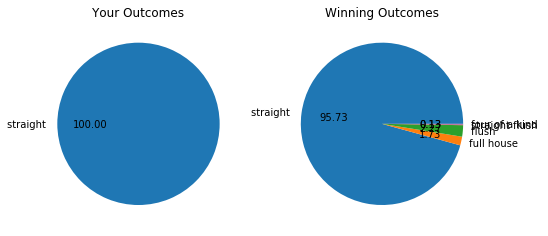

Winning percentage at the flop: 0.0%
Winning percentage at the river: 87.2%



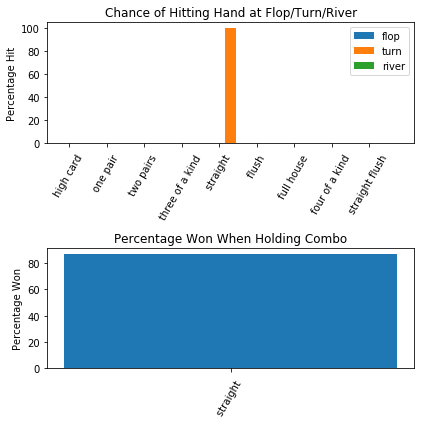

In [39]:
monte_carlo('2s/3c', 2, 750, 
            show_flop = True, show_turn = True, flop = '6d/Ac/5d', turn = '4s', river = '')

In [40]:
def text_fix(text):
    text = text.replace("10", "T")
    if len(text) == 1:
        return text
    out_list = []
    results = [text[i:i+2] for i in range(0, len(text), 2)]
    if '/' in text:
        results = text.split('/')
    for i in results:
        out_list.append(i[0].upper() + i[1].lower())
    output = ''
    for i in out_list[0:-1]:
        output += i + '/'
    output += out_list[-1]
    return output

In [ ]:
def session(loops=1000, num_others = 3):
    def_num_others = num_others
    while True:
        num_others = def_num_others
        my_hand = text_fix(input('Your cards:'))
        if my_hand == 'q' or my_hand == 'quit':
            break
        monte_carlo(my_hand, num_others, num_loops = loops, flop = '', turn = '', river = '',
                show_flop = True, show_turn = True)
        flop = text_fix(input('Flop:'))
        if flop == 'f' or flop == 'fold':
            continue
        num_opp = input('Number of Opponents:')
        if num_opp != '':
            num_others = int(num_opp)
        monte_carlo(my_hand, num_others, num_loops = loops, flop = flop, turn = '', river = '',
                show_flop = True, show_turn = True)
        turn = text_fix(input('Turn:'))
        if turn == 'f' or turn == 'fold':
            continue
        num_opp = input('Number of Opponents:')
        if num_opp != '':
            num_others = int(num_opp)
        monte_carlo(my_hand, num_others, num_loops = loops, flop = flop, turn = turn, river = '',
                show_flop = True, show_turn = True)
        river = text_fix(input('River:'))
        if river == 'f' or river == 'fold':
            continue
        num_opp = input('Number of Opponents:')
        if num_opp != '':
            num_others = int(num_opp)
        monte_carlo(my_hand, num_others, num_loops = loops, flop = flop, turn = turn, river = river,
                show_flop = True, show_turn = True)
    return

In [ ]:
session(num_others = 3, loops = 750)